# Day 5
5, 100

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [15]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish-5-100'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam', 'depth':5}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [17]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.634s 


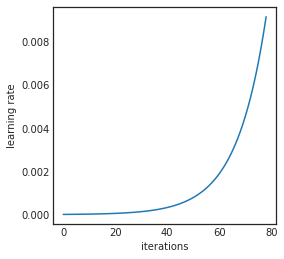

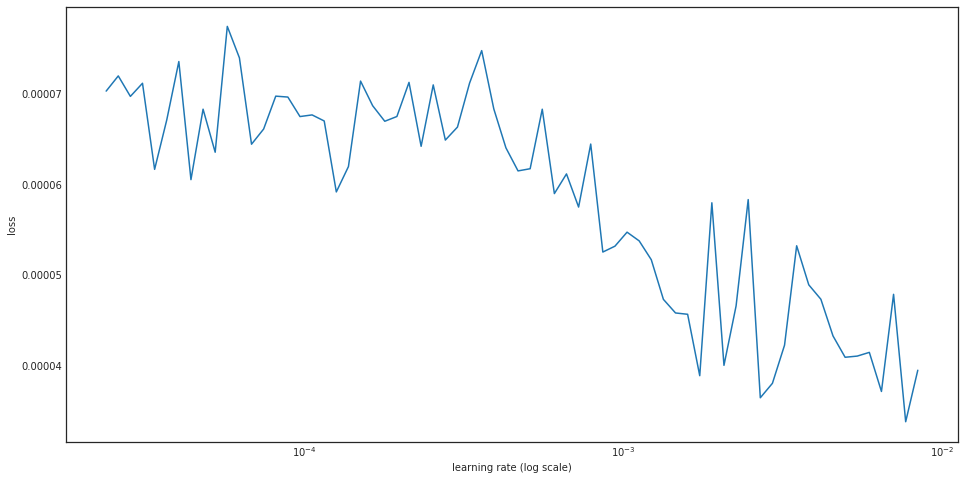

______________________________________



In [18]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-2], trainOnWeights=True, verbose=0)

In [29]:
compileArgs['lr'] = 5e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode



/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.421649). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.211438). Check your callbacks.
  % delta_t_median)


1 New best found: 3.5265410159e-05
2 New best found: 3.45395060545e-05
3 New best found: 3.32254528096e-05
6 New best found: 3.3044723256e-05
7 New best found: 3.25506830904e-05
12 New best found: 3.25091012799e-05
13 New best found: 3.23295354026e-05
14 New best found: 3.20871059689e-05
15 New best found: 3.20210606868e-05
26 New best found: 3.19982418266e-05
27 New best found: 3.18720520314e-05
28 New best found: 3.16263797503e-05
55 New best found: 3.15725872231e-05
59 New best found: 3.15213382727e-05
60 New best found: 3.1515461222e-05
Early stopping after 160 epochs
Score is: {'loss': 3.1515461222049565e-05, 'AUC': 0.09770628751089383, 'wAUC': 0.06223817268488241}
Fold took 229.886s

Running fold 2 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.266652). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.133827). Check your callbacks.
  % delta_t_median)


1 New best found: 3.74840162982e-05
2 New best found: 3.68378462052e-05
3 New best found: 3.43973772041e-05
5 New best found: 3.41953670326e-05
6 New best found: 3.38035100121e-05
7 New best found: 3.33032297843e-05
12 New best found: 3.32480392093e-05
13 New best found: 3.31314801513e-05
14 New best found: 3.29706075314e-05
27 New best found: 3.26832834926e-05
28 New best found: 3.26670033744e-05
29 New best found: 3.25750915695e-05
30 New best found: 3.25350717704e-05
53 New best found: 3.25274822238e-05
56 New best found: 3.25021930158e-05
57 New best found: 3.2478397468e-05
60 New best found: 3.2476476707e-05
61 New best found: 3.24753737928e-05
62 New best found: 3.24707307877e-05
63 New best found: 3.24680400175e-05
Early stopping after 163 epochs
Score is: {'loss': 3.246804001753099e-05, 'AUC': 0.10255192794372436, 'wAUC': 0.06591756276615668}
Fold took 223.516s

Running fold 3 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.294646). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.147750). Check your callbacks.
  % delta_t_median)


1 New best found: 3.62729790879e-05
2 New best found: 3.52583368091e-05
3 New best found: 3.38636175199e-05
6 New best found: 3.3350547131e-05
7 New best found: 3.31518911382e-05
13 New best found: 3.28093294715e-05
14 New best found: 3.26847353193e-05
15 New best found: 3.26552430096e-05
26 New best found: 3.25797706896e-05
28 New best found: 3.25129135611e-05
29 New best found: 3.24374273469e-05
30 New best found: 3.23818477616e-05
31 New best found: 3.23794545922e-05
Early stopping after 131 epochs
Score is: {'loss': 3.2379454592234234e-05, 'AUC': 0.10253937887297093, 'wAUC': 0.06579774025668428}
Fold took 196.760s

Running fold 4 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.295134). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.148158). Check your callbacks.
  % delta_t_median)


1 New best found: 3.56524794591e-05
2 New best found: 3.42241513912e-05
3 New best found: 3.34920589082e-05
5 New best found: 3.34341524155e-05
6 New best found: 3.26130327805e-05
7 New best found: 3.23995098031e-05
13 New best found: 3.21041652641e-05
14 New best found: 3.19559495014e-05
15 New best found: 3.18916511593e-05
25 New best found: 3.16461999681e-05
27 New best found: 3.15033937047e-05
30 New best found: 3.14811748102e-05
31 New best found: 3.14698930473e-05
54 New best found: 3.13152985153e-05
58 New best found: 3.1226450979e-05
61 New best found: 3.12109155084e-05
62 New best found: 3.12012865753e-05
63 New best found: 3.12002817399e-05
Early stopping after 163 epochs
Score is: {'loss': 3.1200281739901584e-05, 'AUC': 0.09913473244413695, 'wAUC': 0.06104849057328232}
Fold took 248.828s

Running fold 5 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.308835). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.154851). Check your callbacks.
  % delta_t_median)


1 New best found: 3.64900407116e-05
2 New best found: 3.51517705384e-05
3 New best found: 3.36227779044e-05
6 New best found: 3.27692982227e-05
7 New best found: 3.25729400379e-05
13 New best found: 3.23294635892e-05
14 New best found: 3.22086499195e-05
15 New best found: 3.21404579378e-05
26 New best found: 3.19552717201e-05
27 New best found: 3.19130214436e-05
28 New best found: 3.18704663354e-05
29 New best found: 3.18257196005e-05
30 New best found: 3.17912593934e-05
31 New best found: 3.17884745424e-05
55 New best found: 3.17163389912e-05
56 New best found: 3.16628415474e-05
57 New best found: 3.1652851737e-05
60 New best found: 3.1596254129e-05
61 New best found: 3.15775608537e-05
62 New best found: 3.15770825792e-05
63 New best found: 3.1576769412e-05
Early stopping after 163 epochs
Score is: {'loss': 3.157676941196576e-05, 'AUC': 0.09647849196771774, 'wAUC': 0.06278694289000009}
Fold took 243.579s

Running fold 6 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.472018). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.236566). Check your callbacks.
  % delta_t_median)


1 New best found: 3.67555576993e-05
2 New best found: 3.61548930624e-05
3 New best found: 3.43102223914e-05
5 New best found: 3.41668903778e-05
6 New best found: 3.35837178371e-05
7 New best found: 3.3545194995e-05
13 New best found: 3.31773271045e-05
14 New best found: 3.30386389512e-05
15 New best found: 3.30186934049e-05
26 New best found: 3.296133924e-05
27 New best found: 3.29579567549e-05
28 New best found: 3.28730256781e-05
30 New best found: 3.27748170495e-05
31 New best found: 3.27711755692e-05
50 New best found: 3.27392982014e-05
51 New best found: 3.2728016204e-05
55 New best found: 3.27135537508e-05
57 New best found: 3.26385221068e-05
58 New best found: 3.25544308305e-05
59 New best found: 3.25503397058e-05
Early stopping after 159 epochs
Score is: {'loss': 3.25503397058467e-05, 'AUC': 0.1019261022564456, 'wAUC': 0.06575033358562643}
Fold took 263.093s

Running fold 7 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.567628). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.284446). Check your callbacks.
  % delta_t_median)


1 New best found: 3.62747038143e-05
2 New best found: 3.54600261574e-05
3 New best found: 3.420859799e-05
5 New best found: 3.38862671222e-05
6 New best found: 3.35963940548e-05
7 New best found: 3.33718701053e-05
13 New best found: 3.30315191603e-05
14 New best found: 3.28888631088e-05
15 New best found: 3.28314970374e-05
25 New best found: 3.27987769661e-05
27 New best found: 3.26401308221e-05
28 New best found: 3.25680734385e-05
29 New best found: 3.25584065134e-05
30 New best found: 3.25293129506e-05
31 New best found: 3.2517112826e-05
50 New best found: 3.24816571428e-05
53 New best found: 3.24567453715e-05
55 New best found: 3.23537516369e-05
56 New best found: 3.23360691575e-05
58 New best found: 3.22860400288e-05
59 New best found: 3.22583030591e-05
60 New best found: 3.22340932544e-05
Early stopping after 160 epochs
Score is: {'loss': 3.223409325441793e-05, 'AUC': 0.10276734262357978, 'wAUC': 0.0656179946532196}
Fold took 247.577s

Running fold 8 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.374970). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.188057). Check your callbacks.
  % delta_t_median)


1 New best found: 3.53773107225e-05
3 New best found: 3.29552076251e-05
6 New best found: 3.24611558349e-05
7 New best found: 3.23361870858e-05
12 New best found: 3.20678426597e-05
13 New best found: 3.19992794543e-05
14 New best found: 3.19330414927e-05
15 New best found: 3.18109701327e-05
25 New best found: 3.17224743793e-05
27 New best found: 3.15697530311e-05
28 New best found: 3.14718498494e-05
29 New best found: 3.14382764858e-05
30 New best found: 3.13829415899e-05
31 New best found: 3.13781337004e-05
55 New best found: 3.13385858373e-05
56 New best found: 3.1328660609e-05
57 New best found: 3.1174077867e-05
Early stopping after 157 epochs
Score is: {'loss': 3.117407786698002e-05, 'AUC': 0.09860259158335882, 'wAUC': 0.06086261365733181}
Fold took 268.971s

Running fold 9 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.407506). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.204443). Check your callbacks.
  % delta_t_median)


1 New best found: 3.6956498316e-05
2 New best found: 3.55711726888e-05
3 New best found: 3.45419362751e-05
5 New best found: 3.43229322402e-05
6 New best found: 3.38056950873e-05
7 New best found: 3.36678638286e-05
13 New best found: 3.31201696578e-05
14 New best found: 3.30147327784e-05
15 New best found: 3.30075071723e-05
27 New best found: 3.28266716069e-05
29 New best found: 3.27443911367e-05
30 New best found: 3.27342722868e-05
31 New best found: 3.27095924562e-05
58 New best found: 3.26204319207e-05
Early stopping after 158 epochs
Score is: {'loss': 3.2620431920716454e-05, 'AUC': 0.10107735157293907, 'wAUC': 0.06656734737461645}
Fold took 253.084s

Running fold 10 / 10


/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.460106). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.230583). Check your callbacks.
  % delta_t_median)


1 New best found: 3.72956614171e-05
2 New best found: 3.61500724727e-05
3 New best found: 3.4724842342e-05
6 New best found: 3.38932179718e-05
7 New best found: 3.36639129677e-05
12 New best found: 3.36066110003e-05
13 New best found: 3.3458701279e-05
14 New best found: 3.32658239466e-05
15 New best found: 3.31266552861e-05
28 New best found: 3.28673436495e-05
29 New best found: 3.28414796741e-05
30 New best found: 3.28105743372e-05
31 New best found: 3.2803614381e-05
Early stopping after 131 epochs
Score is: {'loss': 3.280361438096603e-05, 'AUC': 0.10378875297484602, 'wAUC': 0.06743098645042611}
Fold took 219.353s


______________________________________
Training finished
Cross-validation took 2397.791s 


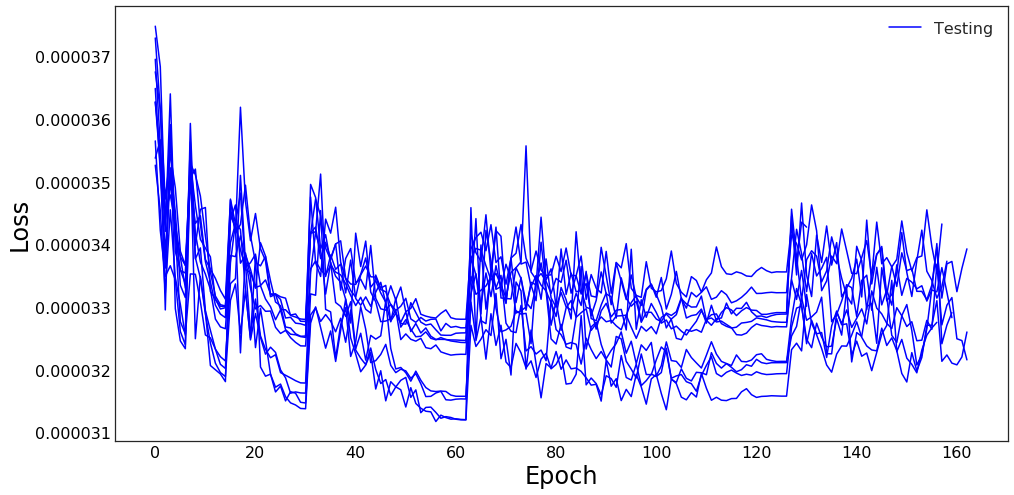

Mean wAUC = 0.0644 +- 0.0007
______________________________________



In [31]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=100, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [32]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [33]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 7 with loss = 3.117407786698002e-05
Model 1 is 3 with loss = 3.1200281739901584e-05
Model 2 is 0 with loss = 3.1515461222049565e-05
Model 3 is 4 with loss = 3.157676941196576e-05
Model 4 is 6 with loss = 3.223409325441793e-05
Model 5 is 2 with loss = 3.2379454592234234e-05
Model 6 is 1 with loss = 3.246804001753099e-05
Model 7 is 5 with loss = 3.25503397058467e-05
Model 8 is 8 with loss = 3.2620431920716454e-05
Model 9 is 9 with loss = 3.280361438096603e-05


## Response on development data

In [34]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000887772457748s per sample

Predicting batch 2 out of 10
Prediction took 0.000476111841705s per sample

Predicting batch 3 out of 10
Prediction took 0.00052350287759s per sample

Predicting batch 4 out of 10
Prediction took 0.000455110859871s per sample

Predicting batch 5 out of 10
Prediction took 0.000448225700855s per sample

Predicting batch 6 out of 10
Prediction took 0.00043062710762s per sample

Predicting batch 7 out of 10
Prediction took 0.000477562403679s per sample

Predicting batch 8 out of 10
Prediction took 0.000588065046353s per sample

Predicting batch 9 out of 10
Prediction took 0.000612982702682s per sample

Predicting batch 10 out of 10
Prediction took 0.000521416163181s per sample



In [35]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.90368465506, weighted 0.939724551379


## Response on val data

In [36]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000452912807465s per sample

Predicting batch 2 out of 10
Prediction took 0.000484544181824s per sample

Predicting batch 3 out of 10
Prediction took 0.000459679412842s per sample

Predicting batch 4 out of 10
Prediction took 0.000447123622894s per sample

Predicting batch 5 out of 10
Prediction took 0.000499240970612s per sample

Predicting batch 6 out of 10
Prediction took 0.000509718608856s per sample

Predicting batch 7 out of 10
Prediction took 0.000507007980347s per sample

Predicting batch 8 out of 10
Prediction took 0.000508179616928s per sample

Predicting batch 9 out of 10
Prediction took 0.000511343622208s per sample

Predicting batch 10 out of 10
Prediction took 0.000498750400543s per sample



In [37]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.901125062895, weighted 0.934808744708


## Evaluation

### Import in dataframe

In [38]:
valframe = convertToDF(valData)

50000 candidates loaded


In [39]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

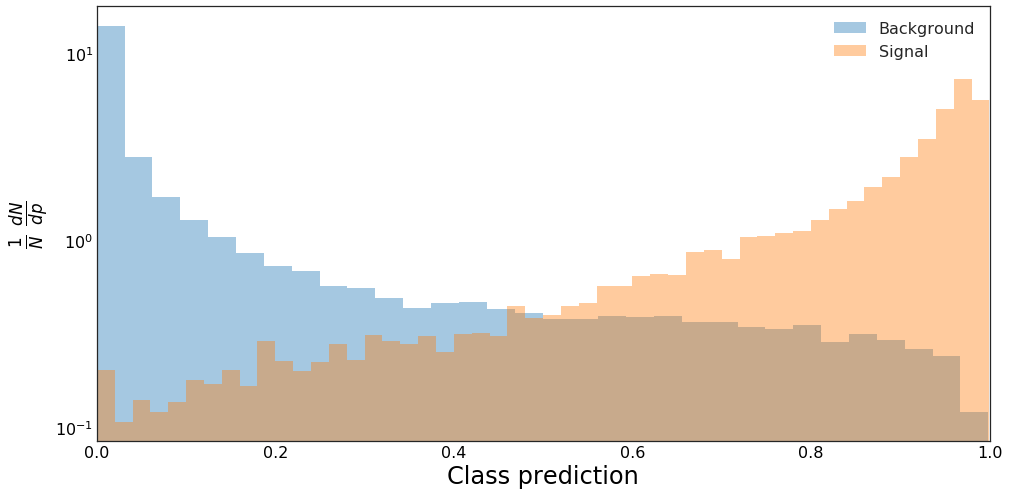

In [40]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [ ]:
def amsScan(inData, scale=False):
    best = [0,-1]
    ams = []
    for index, row in inData.iterrows():
        s = np.sum(inData.loc[(inData['pred_class'] >= row['pred_class']) & (inData['gen_target'] == 1), 'gen_weight'])
        b = np.sum(inData.loc[(inData['pred_class'] >= row['pred_class']) & (inData['gen_target'] == 0), 'gen_weight'])
        if scale:
            s *= scale[0]/np.sum(inData[(inData['gen_target'] == 1)]['gen_weight'])
            b *= scale[1]/np.sum(inData[(inData['gen_target'] == 0)]['gen_weight'])
        ams.append(AMS(s, b))
        if ams[-1] > best[1]:
            best = [row['pred_class'], ams[-1]]
    print best
    return ams, best

In [ ]:
def foldAMSScan(inData, N=10):
    kf = StratifiedKFold(n_splits=N, shuffle=True)
    folds = kf.split(inData, inData['gen_target'])
    bests = []
    for i, (train, test) in enumerate(folds):
        bests.append(amsScan(inData.iloc[test], (np.sum(inData[(inData['gen_target'] == 1)]['gen_weight']), np.sum(inData[(inData['gen_target'] == 0)]['gen_weight'])))[1])
        print "Fold {}, best AMS {} at cut of {}. Total weights Signal:Bkg. {}:{}".format(i, bests[-1][1], bests[-1][0],
                                                                                          np.sum(inData.iloc[test][inData.gen_target == 1]['gen_weight']),
                                                                                          np.sum(inData.iloc[test][inData.gen_target == 0]['gen_weight']))
    print "Mean cut", np.average([x[0] for x in bests], weights=[1/x[1] for x in bests]), "mean AMS", np.average([x[1] for x in bests], weights=[1/x[1] for x in bests])
    return bests

In [42]:
valframe['ams'] = amsScan(valframe)[0]

[0.9385799169540405, 1.6971127042214555]


In [41]:
bests = foldAMSScan(valframe, 10)

[0.9794526100158691, 1.9764871339930272]
Fold 0, best AMS 1.97648713399 at cut of 0.979452610016. Total weights Signal:Bkg. 13.7991294861:8182.8046875


../Modules/Basics.py:61: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 1]['gen_weight']),
../Modules/Basics.py:62: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  np.sum(inData.iloc[test][inData.gen_target == 0]['gen_weight']))


[0.9419369697570801, 1.5722483240627125]
Fold 1, best AMS 1.57224832406 at cut of 0.941936969757. Total weights Signal:Bkg. 13.4129962921:8086.4140625
[0.9859339594841003, 2.0195350244966583]
Fold 2, best AMS 2.0195350245 at cut of 0.985933959484. Total weights Signal:Bkg. 13.3341064453:8339.12109375
[0.9416276812553406, 2.102430012395269]
Fold 3, best AMS 2.1024300124 at cut of 0.941627681255. Total weights Signal:Bkg. 14.5527515411:8149.67675781
[0.9610548615455627, 1.7751311189466334]
Fold 4, best AMS 1.77513111895 at cut of 0.961054861546. Total weights Signal:Bkg. 13.9886264801:8141.36474609
[0.9753686189651489, 2.0676961894150354]
Fold 5, best AMS 2.06769618942 at cut of 0.975368618965. Total weights Signal:Bkg. 14.2659378052:8121.1953125
[0.9863513708114624, 2.3181688940853116]
Fold 6, best AMS 2.31816889409 at cut of 0.986351370811. Total weights Signal:Bkg. 13.456205368:8368.21191406
[0.9272370934486389, 1.7293674963236678]
Fold 7, best AMS 1.72936749632 at cut of 0.9272370934

In [44]:
def scoreTest(ensemble, weights):
    testData = h5py.File(dirLoc + 'testing.hdf5', "r+")
    batchEnsemblePredict(ensemble, weights, testData, ensembleSize=10, verbose=1)

In [45]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000488632037423s per sample

Predicting batch 2 out of 10
Prediction took 0.000419510091435s per sample

Predicting batch 3 out of 10
Prediction took 0.000510014690052s per sample

Predicting batch 4 out of 10
Prediction took 0.000513583126935s per sample

Predicting batch 5 out of 10
Prediction took 0.000443488090689s per sample

Predicting batch 6 out of 10
Prediction took 0.000451049180464s per sample

Predicting batch 7 out of 10
Prediction took 0.000471913966266s per sample

Predicting batch 8 out of 10
Prediction took 0.000483032235232s per sample

Predicting batch 9 out of 10
Prediction took 0.000528948727521s per sample

Predicting batch 10 out of 10
Prediction took 0.000473568981344s per sample



In [46]:
saveTest(0.9612475834616996, 'Day_5')

../Data/Day_5_test.csv


In [47]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_5_test.csv -m"5-100"

Successfully submitted to Higgs Boson Machine Learning Challenge